# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Capítulo 10 - Mini-Projeto - Agrupando Clientes Por Consumo de Energia</font>

### Especificação

A partir de dados de consumo de energia de clientes, nosso trabalho é agrupar os consumidores por similaridade a afim de compreender o comportamento dos clientes e sua relação com o consumo de energia.

Você deve executar as seguintes tarefas:
    
1- Tratar os valores ausentes nos dados.

2- Coletar uma amostra de 1% dos dados para criar o modelo de clusterização com o K-Means.

3- Encontrar o melhor valor de K para esse conjunto de dados.

4- Criar o modelo K-Means usando o valor de K encontrado no item 3.

5- Criar um Meshgrid para visualização de todos os clusters.

6- Visualizar os centróides.

7- Calcular o Silhoutte Score.

8 - Calcular a média de consumo de energia por cluster (usar a coluna Global_active_power para o cálculo da média).

Dica: Para o item 8, considere a amostra criada no item 2.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

In [2]:
# Carregando os dados
dataset = pd.read_csv('dados/household_power_consumption.txt', delimiter = ';', low_memory = False)

In [3]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Tarefa 1 - Tratar os valores ausentes nos dados

In [4]:
# Sub_metering_3
# Verifica a existência de valores NA e caso tenham, quantos são.
dataset.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
ds = dataset.drop(labels=["Date","Time"], axis=1)

In [6]:
ds.isna().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
ds.dropna(inplace=True)

In [8]:
ds.shape

(2049280, 7)

In [9]:
dataset.shape

(2075259, 9)

In [10]:
ds = ds.apply(pd.to_numeric, errors = "coerce")
non_numeric_rows = ds.isnull().any(axis=1)
print(ds[non_numeric_rows])

Empty DataFrame
Columns: [Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3]
Index: []


## Tarefa 2 - Coletar uma amostra de 1% dos dados para criar o modelo de clusterização com o K-means

In [11]:
# Coletando randômicamente 1% dos dados
ds_sample = ds.sample(frac=0.01)

In [12]:
# Shape da amostra
ds_sample.shape

(20493, 7)

In [13]:
# Shape original
ds.shape

(2049280, 7)

## Tarefa 3 - Encontrar o melhor valor de K para esse conjunto de dados

In [14]:
# Verifcando valores de grupos de 2 a 9 e calculando a inertia de cada grupo - Dados não alterados
wcss = []
Ks=range(2,10)
for k in Ks:
    kmeans=KMeans(n_clusters=k, random_state=8499)
    kmeans.fit(X=ds_sample)
    wcss.append(kmeans.inertia_)

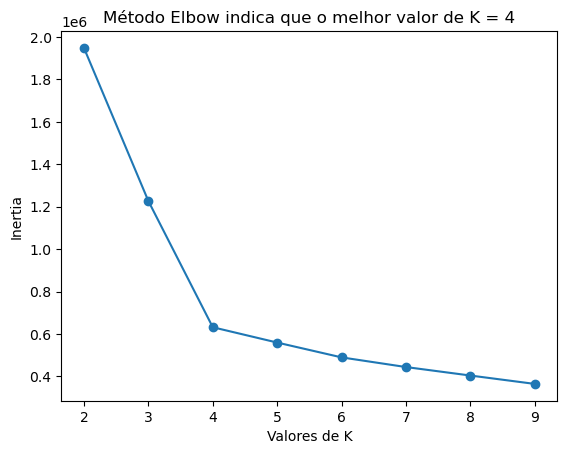

In [15]:
plt.plot(Ks, wcss, "o-")
plt.xlabel("Valores de K")
plt.ylabel("Inertia")
plt.title("Método Elbow indica que o melhor valor de K = 4")
plt.show()

In [16]:
# Utilizando PCA para reduzir a dimensionalidade dos dados
pca = PCA(2)
df = pca.fit_transform(ds_sample)
df.shape

(20493, 2)

In [17]:
# Verifcando valores de grupos de 2 a 9 e calculando a inertia de cada grupo
wcss = []
Ks=range(2,10)
for k in Ks:
    kmeans=KMeans(n_clusters=k, random_state=8499)
    kmeans.fit(X=df)
    wcss.append(kmeans.inertia_)

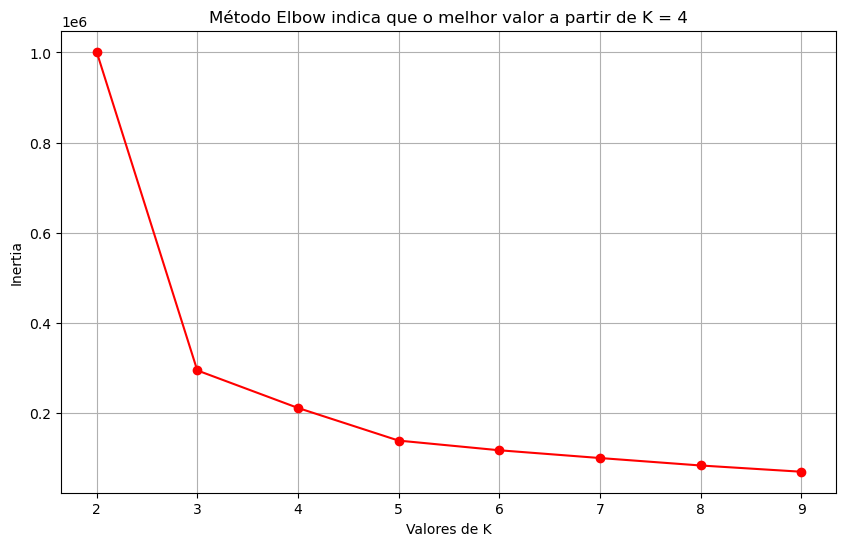

In [107]:
plt.rcParams["figure.figsize"]=(10,6)
plt.plot(Ks, wcss, "ro-")
plt.xlabel("Valores de K")
plt.ylabel("Inertia")
plt.title("Método Elbow indica que o melhor valor a partir de K = 4")
plt.grid()
plt.show()

In [108]:
k_range = range(1,12)
k_means_var = [KMeans(n_clusters = k).fit(df) for k in k_range]

In [109]:
centroids = [X.cluster_centers_ for X in k_means_var]

In [110]:
# Calculando a distância euclidiana de cada ponto de dado para o centróide
k_euclid = [cdist(df, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [111]:
# Soma dos quadrados das distâncias dentro do cluster
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

In [112]:
# Soma total dos quadrados
soma_total = sum(pdist(df)**2)/df.shape[0]

In [113]:
# Soma dos quadrados entre clusters
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

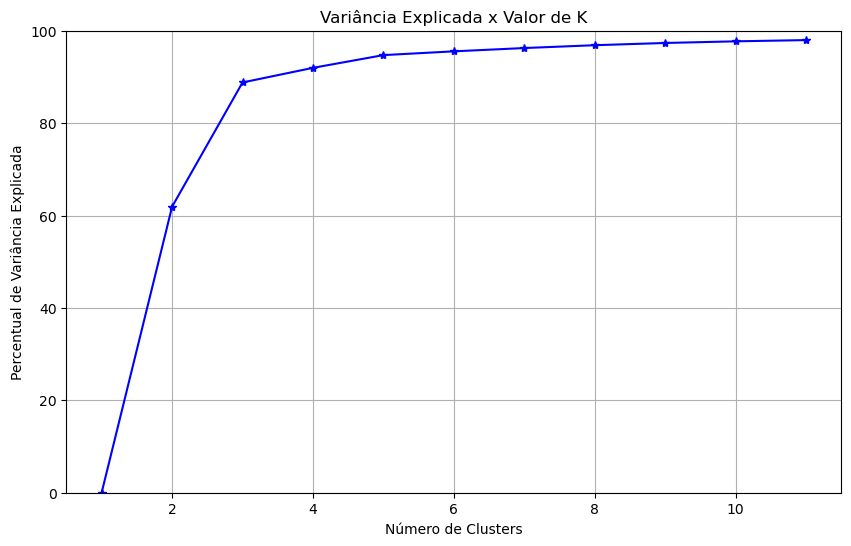

In [114]:
# Curva de Elbow
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de Variância Explicada')
plt.title('Variância Explicada x Valor de K')

## Tarefa 4 - Criar o modelo K-Means usando o valor de K encontrado no item 3

In [115]:
modelo_final = KMeans(n_clusters=5, random_state=8499)
y_pred = modelo_final.fit_predict(X=df)

## Tarefa 5 - Criar um Meshgrid para visualização de todos os clusters

In [116]:
pd.DataFrame(df)

,0,1
0,-7.416884,0.463960
1,-7.116247,1.747416
2,-7.268076,1.110444
3,-4.138207,2.566036
4,-6.514528,0.063646
...,...,...
20488,10.021660,-6.050130
20489,9.402814,-6.442911
20490,-6.899060,-0.180963
20491,-7.889727,0.176260


In [117]:
x_min, x_max = df[:,0].min() - 5, df[:,0].max() - 1
y_min, y_max = df[:,1].min() + 1, df[:,1].max() + 5

In [118]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

In [119]:
Z = modelo_final.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

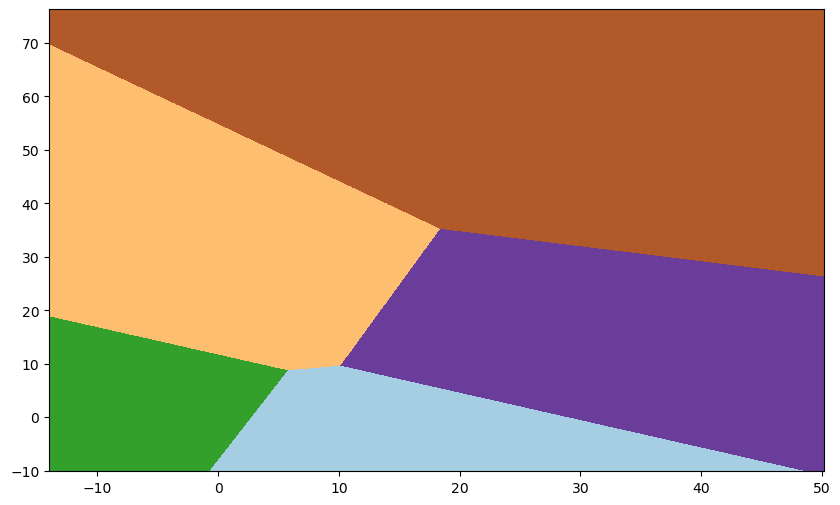

In [120]:
plt.figure(1)
plt.clf()
plt.imshow(Z,
          interpolation = "nearest",
          extent = (xx.min(), xx.max(), yy.min(), yy.max()),
          cmap = plt.cm.Paired,
          aspect = "auto",
          origin = "lower")

## Tarefa 6 - Visualizar os centróides

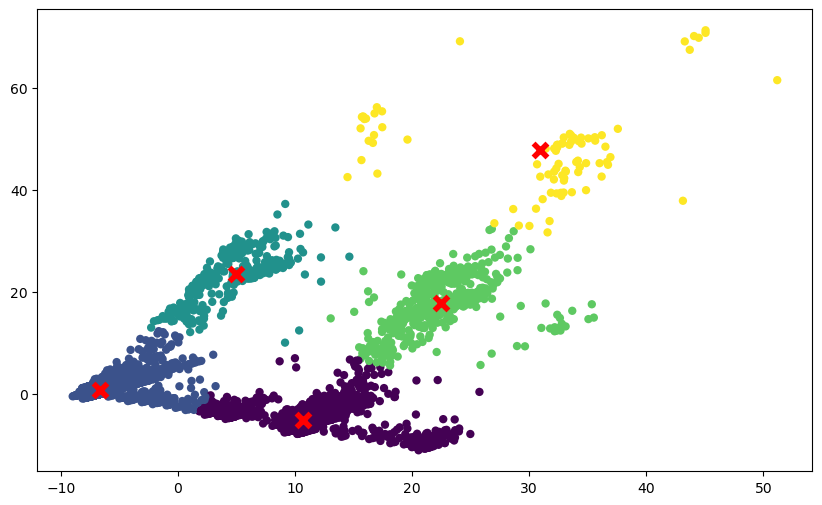

In [121]:
# Adicionando a visualização dos centróides no meshgrid dos clusters
plt.scatter(df[:,0], df[:,1], c=y_pred, edgecolor="none")
plt.scatter(modelo_final.cluster_centers_[:,0], modelo_final.cluster_centers_[:,1], marker = 'x', color = 'r', s = 100, linewidths = 4)
plt.show()

## Tarefa 7 - Calcular o Silhouette Score

In [122]:
# Silhouette Score é 0.86, dessa forma é possível notar pela proximidade com 1 que os clusters foram bem separados
# Podendo ser facilmente verificado pelo plot.
s_scr = silhouette_score(df, modelo_final.labels_,metric="euclidean",random_state=8499)
s_scr

0.8654046703300857

## Tarefa 8 - Calcular a média de consumo de energia por cluster (usar a cluna Global_active_power para o cálculo da média).
### Dica: Para o item 8, considere a amostra criada no item 2

In [123]:
# Lista com nomes das colunas
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [124]:
# Cria o cluster map
cluster_map = pd.DataFrame(ds_sample, columns = names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = modelo_final.labels_

In [125]:
cluster_map

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
2067409,0.220,0.064,239.90,1.0,0.0,0.0,0.0,1
1762495,0.336,0.106,241.99,1.4,0.0,2.0,0.0,1
1719931,0.416,0.104,242.86,1.8,0.0,1.0,0.0,1
26647,2.336,0.000,242.66,9.6,0.0,0.0,0.0,1
1264920,0.342,0.000,241.40,1.6,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...
1718865,1.678,0.000,242.37,6.8,0.0,0.0,18.0,0
1202164,1.360,0.000,243.18,5.6,0.0,0.0,18.0,0
1829369,0.200,0.000,241.78,0.8,0.0,0.0,1.0,1
1121768,0.340,0.078,244.74,1.4,0.0,0.0,0.0,1


In [126]:
# Calculando a média do consumo de energia por cluster
cluster_map.groupby("cluster")["Global_active_power"].mean()

cluster
0    1.793092
1    0.515455
2    2.836241
3    4.103345
4    6.174568
Name: Global_active_power, dtype: float64

### Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>